### 💭 목표
- 타이타닉 데이터를 학습해서 생존자/사망자를 예측해보자
- 머신러닝 전체 과정을 진행해보자

##### 🔻 1. 문제 정의
- 생존/사망을 예측
- kaggle 경진대회에서 높은 순위를 차지해보자

##### 🔻 2. 데이터 수집(불러와서 확인)

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # 시각화 라이브러리

- 타이타닉 train 데이터와 test 데이터를 불러와서 변수에 저장(PassengerID라는 컬럼을 인덱스 자리로 옮기면서 불러오기)

In [2]:
# csv -> pd.read_csv

test = pd.read_csv("./data/test.csv", index_col="PassengerId")
train = pd.read_csv("./data/train.csv", index_col="PassengerId")

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 크기확인
print("훈련 데이터 크기 :",train.shape)
print("테스트 데이터 크기 :", test.shape)
# 컬럼의 개수가 다르다

훈련 데이터 크기 : (891, 11)
테스트 데이터 크기 : (418, 10)


##### 🔻 3. 데이터 전처리 및 데이터 탐색

In [4]:
train.info()
# 결측치가 있는 컬럼 : Age, Cabin, Embarked
# 데이터 타입 : 숫자(정수, 실수), 문자
# 모델링을 할 때 모델은 숫자 데이터만 인식
# 문자 -> 숫자 : 인코딩(원핫인코딩, 라벨인코딩)

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
test.info()
# Survived 컬럼이 없다! -> 우리가 맞춰야하는 답 데이터
# y_test는 어디있을까?
# 결측치가 있는 컬럼 : Age, Fare, Cabin
# 데이터 타입 : 숫자(정수, 실수), 문자열

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [6]:
train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [7]:
# 컬럼 정보 정리
train.columns
# 'Survived' : 생존/사망 결과값이 담긴 컬럼(정답데이터 -> 0:사망, 1:생존)
# 'Pclass' : 승객 등급(1: 상위층, 2:중상위층, 3:하위층)
# 'Name'
# 'Sev'
# 'Age'
# 'SibSp' : 형제, 자매, 배우자의 수 (같이 탑승한)
# 'Parch' : 부모/자식의 수 (같이 탑승한)
# 'Ticket' : 티켓 번호
# 'Fare' : 요금
# 'Cabin' : 객실 번호
# 'Embarked' : 승선항 (S = Southampton, C = Cherbourg, Q = Queenstown)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- train : Embarked 컬럼 결측치 채우기

In [8]:
# 데이터 확인 -> train 기준으로 확인
# 좋은 모델을 만드려면 학습 데이터를 잘 구비해야한다.
# train에서 Embarked 컬럼 인덱싱 -> S, C, Q가 몇 개씩 있는지 확인
# 결측치 채우는 방법
# 1. 제거(제거해도 데이터에 영향이 미미)
# 2. 임의의 값으로 채워넣기(중앙값, 평균값, 최빈값)
train['Embarked'].value_counts()  # S에서 제일 많이 탔다
# 결측치 몇개?
train['Embarked'].isnull().sum()
# train['Embarked'] 결측치가 있는 데이터 출력하기
train[train['Embarked'].isnull() == True]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [9]:
# 두 사람의 데이터가 서로 비슷
# -> 같은 승선항에서 탔을 것이라고 가정
# 사람이 가장 많이 탐승한 장소의 승선항 값으로 채워보기
# 1. 인덱싱을 하나씩 해서 접근 -> 값을 수정
# 2. NaN 값(비어있는 값)을 모두 찾아서 대체해주는 함수를 사용
# 결측치가 있는 자리에 값을 초기화해서 대입
train['Embarked'] = train['Embarked'].fillna('S')

In [10]:
train['Embarked'].isnull().sum()  # -> NaN 값이 채워졌구나!

0

- test 데이터에 있는 Fare 컬럼 결측치 채우기

In [11]:
# test 데이터에서 Fare 컬럼 인덱싱한 후 결측치가 존재하는 행 출력하기
test[test['Fare'].isnull()]
# pclass 혹은 성별 혹은 도시와 연관이 되지 않았을까?
# 상관관계 확인
train.corr(numeric_only = True)  # 문자열로 된 컬럼 포함 -> 상관계수 X
# Fare 컬럼과 연관이 있는 컬럼은 무엇일까? -> Pclass
# -1 ~ +1 표현되는 계수
# -1과 +1에 가까울수록 속성 간에 관계가 깊다
# 0에 가까울수록 상대적으로 관계가 깊지 않다(적음)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [12]:
# train 데이터의 Fare 컬럼 기술통계량 확인
# describe()
# 중앙값, 평균값 중에 대표값으로 설정할 값을 찾기 위해
train['Fare'].describe()  # 평균값이 아닌 중앙값을 가지고 대표값으로 선택

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [13]:
# Pclass, Sex -> Fare 중앙 값, 평균 값으로 결측치를 대체해보자
# 1. female -> Fare 중앙 값, 평균 값을 확인하고 해당 값으로 채워보자
# 2. male -> Fare 값을 채워보자
# 3. test['Fare'] 3등급, 남성 승객의 중앙값
# train 데이터를 기준으로 승객 등급, 성별 그룹핑(groupby)
# 중앙값 median()
train[['Pclass', 'Sex', 'Fare']].groupby(['Pclass', 'Sex']).median()

# test['Fare'] 결측치를 채워주자 -> 7.925
test['Fare'] = test['Fare'].fillna(7.925)
test['Fare'].isnull().sum()

0

- Age 결측치 채우기
    - train, test 모두 처리
    - 나이의 평균, 중앙값으로 결측치를 채워보자
    - 다른 컬럼과의 상관관계를 이용하여 결측치 채워보기

In [14]:
# 기술통계량
# 중앙값 vs 평균값? ->
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
# Age 컬럼과 상관관계가 높은 컬럼 찾아보기! -> Pclass
train.corr(numeric_only=True)['Age'].abs().sort_values(ascending=False)

Age         1.000000
Pclass      0.369226
SibSp       0.308247
Parch       0.189119
Fare        0.096067
Survived    0.077221
Name: Age, dtype: float64

In [16]:
# Pclass, Sex, Age 컬럼의 평균값 출력해보기
# female, age 평균
# male, age 평균
gb1 = train[['Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex']).mean()
gb1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [17]:
# gb1 3등급, male 나이 평균값 접근해보기
# 멀티인덱스 접근 방법

gb1.loc[(3, 'male')] # gb1.loc[3,'male']

# 1등급 여성 나이 평균 출력해보기

gb1.loc[(1, 'female')]

Age    34.611765
Name: (1, female), dtype: float64

In [18]:
train[train['Age'].isnull()]

# 결측치를 채우기 위해서 각 승객의 등급, 성별을 확인한 후
# Age 평균 값을 인덱싱하여 채움

# ⭐⭐ 어려움 ⭐⭐ 
def pre_age(row) :
    
    # 만약 나이가 결측치라면, 값을 가져오고 row에는 한 사람의 정보가 담긴다.
    if np.isnan(row['Age']) : # 결측치를 확인하는 함수 == np.isnan(대상)
        return gb1.loc[(row['Pclass'], row['Sex'])]
    
    # 만약 나이가 결측치가 아니라면 원래 나이값을 그대로 사용
    else :
        return row['Age']

# train['Age']에 pre_age 함수를 axis = 1로 한줄씩 적용해준다.
train['Age'] = train.apply(pre_age, axis = 1)
train['Age'].isnull().sum()

0

In [19]:
# test 데이터의 Age 컬럼 결측치도 처리
test['Age'] = test.apply(pre_age, axis = 1)
test['Age'].isnull().sum()

0

In [20]:
train['Age'] = train['Age'].astype('int64')
test['Age'] = test['Age'].astype('int64')
test['Age'].dtype

C:\Users\smhrd\AppData\Local\Temp\ipykernel_13808\2688540183.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  train['Age'] = train['Age'].astype('int64')
C:\Users\smhrd\AppData\Local\Temp\ipykernel_13808\2688540183.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test['Age'] = test['Age'].astype('int64')


dtype('int64')

- train, test : Cabin(객실번호) 채우기

In [21]:
# train['Cabin'] 결측치는 몇 개 있을까?
train['Cabin'].isnull().sum()

687

In [22]:
# 중복없이 값 확인
# unique()
train['Cabin'].unique()
# 생김새 : 층 + 방번호
# 결측치를 임의로 'M' 값으로 채워보기
# fillna()로 결측치를 처리한 후 Deck 컬럼을 생성해서 담기

train['Deck'] = train['Cabin'].fillna('M')
test['Deck'] = test['Cabin'].fillna('M')

In [23]:
# Deck 컬럼에서 맨 첫글자 알파벳만 추출하기
train['Deck'] = train['Deck'].str[0]
test['Deck'] = test['Deck'].str[0]
train['Deck']

PassengerId
1      M
2      C
3      M
4      C
5      M
      ..
887    M
888    B
889    M
890    C
891    M
Name: Deck, Length: 891, dtype: object

In [24]:
# Cabin 컬럼 삭제
# drop()
train.drop('Cabin', axis = 1, inplace = True)
test.drop('Cabin', axis = 1, inplace = True)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Embarked  418 non-null    object 
 9   Deck      418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


##### -  데이터 탐색

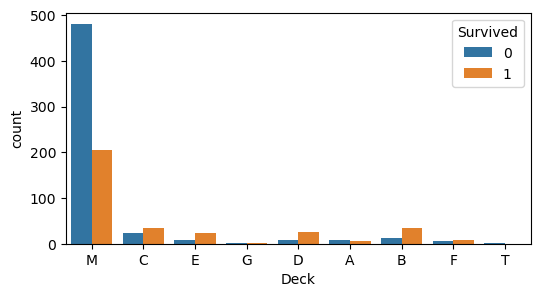

In [27]:
# Deck 컬럼과 Survived 컬럼의 연관성 확인
# 막대그래프 활용
plt.figure(figsize=(6,3))
sns.countplot(data=train, x='Deck', hue='Survived')
plt.show()

In [28]:
# M에서 상대적으로 많은 사람들이 사망했다
# survived에 영향을 주지는 않을까?

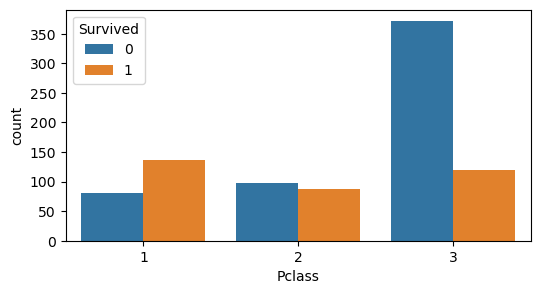

In [29]:
# Pclass와 Survived 시각화
# countplot
# 생존/사망 의미 파악해보기
plt.figure(figsize=(6,3))
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.show()

In [30]:
# 1등급 - 비교적 생존율 높음
# 2등급 - 사망율이 생존율보다 조금 높다
# 3등급 - 사망율이 월등히 높다

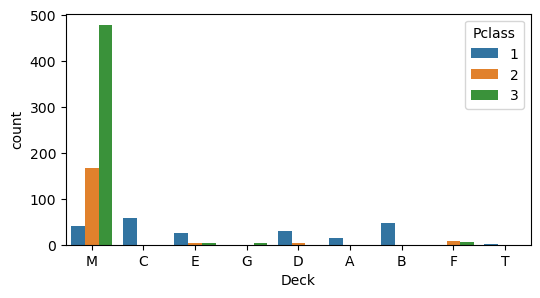

In [31]:
# Deck과 Pclass를 연관지어서 시각화
# X = Deck
# hue = Pclass
plt.figure(figsize=(6, 3))
sns.countplot(data = train, x = 'Deck', hue = 'Pclass')
plt.show()

In [32]:
# M에서 사망율이 높았던건 3등급의 사람이 많아서였음
# Deck라는 컬럼이 생존/사망에 크게 영향을 주고 있는 것은 아니다
# 오히려 Pclas는 영향을 크게 미치고 있다.

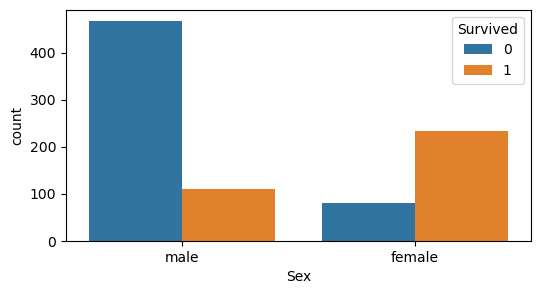

In [33]:
# Sex과 Survived의 시각화
plt.figure(figsize=(6, 3))
sns.countplot(data = train, x = 'Sex', hue = 'Survived')
plt.show()

In [34]:
# 남성은 상대적으로 사망율이 높음
# 여성은 상대적으로 생존율이 높음
# 생존/사망을 판별하는데 성별은 도움이 되겠다

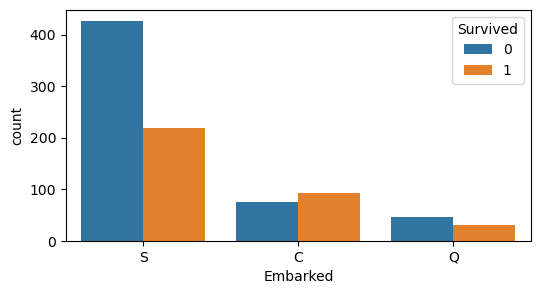

In [35]:
# Embarked와 Survived의 관계 시각화
plt.figure(figsize=(6, 3))
sns.countplot(data = train, x = 'Embarked', hue = 'Survived')
plt.show()

In [36]:
# 승선항이 생존과 사망에 영향을 미쳤는지 아닌지 확고한 증거가 없다.

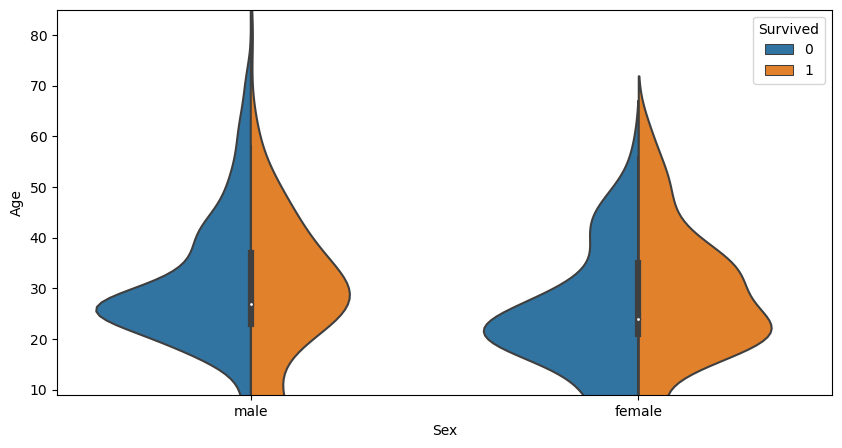

In [37]:
# Age와 Survived 연관성 확인하기
# violoin plot - 바이올린 플롯
# 바이올린 플롯 -> 데이터의 분포를 확인할 때 사용하는 그래프
plt.figure(figsize = (10, 5))
sns.violinplot(data = train,
              x = 'Sex',
              y = 'Age',
              hue='Survived', # 개수
              split=True) # x와 y를 나누겠다!

plt.ylim(9, 85) # 0살 부터 85살까지 보겠다

plt.show()

In [38]:
# 20 ~ 40대에 해당하는 남자가 사망율 및 생존율이 높았다.
# 20대 초반에 해당하는 여자가 사망율 및 생존율이 높았다.

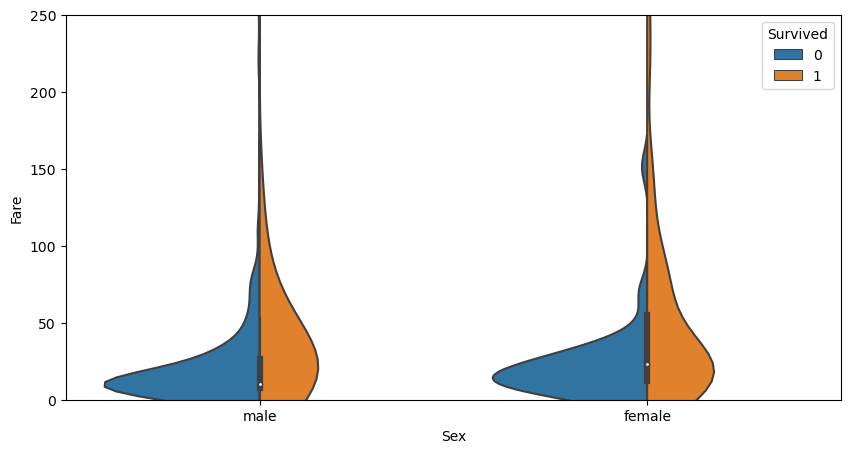

In [39]:
# 성별과 요금에 따른 생존율 분석 - violin plot
# Sex -> x축
# Fare -> y축
# Survived -> hue
plt.figure(figsize = (10, 5))
sns.violinplot(data = train,
              x = 'Sex',
              y = 'Fare',
              hue='Survived', # 개수
              split=True) # x와 y를 나누겠다!

plt.ylim(0, 250) # violoinplot을 유지하려고 0 미만에 데이터 값이 생기므로 0부터 설정

plt.show()

In [40]:
# 저렴한 요금을 내고 탄 사람은 상대적으로 많이 사망함

- Parch, SibSp -> 부모자식, 형제자매배우자
    - 특성공학 : 두 개의 컬럼을 더해서 가족의 숫자라는 새로운 컬럼 생성
    - train에서 생성하고 test에 동일하게 적용

In [41]:
# 새로운 컬럼 : 'Family_size' = Parch + SibSp + 1(자기자신)
train['Family_size'] = train['Parch'] + train['SibSp'] + 1
test['Family_size'] = test['Parch'] + test['SibSp'] + 1

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Deck         891 non-null    object 
 11  Family_size  891 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 90.5+ KB


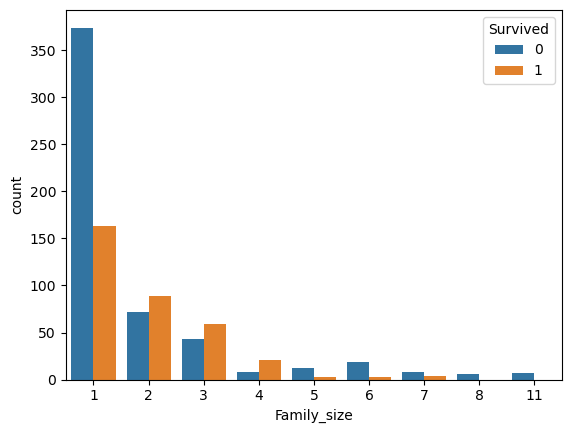

In [43]:
# 시각화
# countplot
sns.countplot(data = train, x = 'Family_size', hue = 'Survived')
plt.show()

In [44]:
# 1명 -> 사망율 > 생존율
# 2명 ~ 4명 -> 사망율 < 생존율
# 5이상 -> 사망율 > 생존율
# 범주를 줄여주자 -> binning(사소한 관찰 오류를 줄일 수 있다!

In [45]:
# 가족 사이즈가 1이면 Alone, 2 ~ 4명 Small, 5명 이상 Large
# train, test 적용
# pd.cut()
bins = [0, 1, 4, 11]
labels = ['Alone', 'Small', 'Large']
train['Family_group'] = pd.cut(train['Family_size'],
                              bins = bins,
                              labels = labels)
train['Family_group']

PassengerId
1      Small
2      Small
3      Alone
4      Small
5      Alone
       ...  
887    Alone
888    Alone
889    Small
890    Alone
891    Alone
Name: Family_group, Length: 891, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

In [46]:
test['Family_group'] = pd.cut(test['Family_size'],
                              bins = bins,
                              labels = labels)
test['Family_group']

PassengerId
892     Alone
893     Small
894     Alone
895     Alone
896     Small
        ...  
1305    Alone
1306    Alone
1307    Alone
1308    Alone
1309    Small
Name: Family_group, Length: 418, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

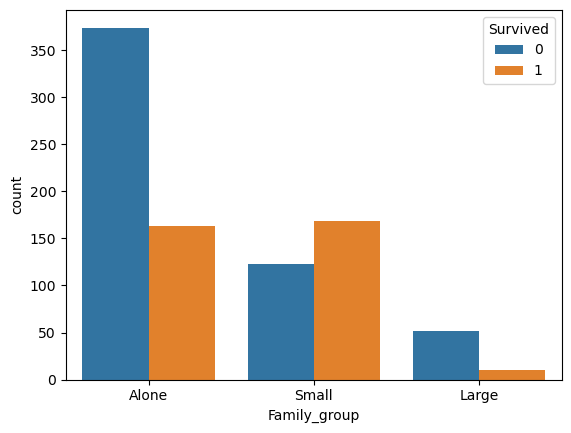

In [47]:
sns.countplot(data = train, x = 'Family_group', hue = 'Survived')
plt.show()

In [48]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Deck', 'Family_size', 'Family_group'],
      dtype='object')

- 불필요한 컬럼 삭제
    - Name, Ticket, Family_size

In [49]:
# train
train.drop(['Name', 'Ticket', 'Family_size'], axis = 1, inplace = True)

In [50]:
# test
test.drop(['Name', 'Ticket', 'Family_size'], axis = 1, inplace = True)

In [51]:
test.info()

# 전처리 끝

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        418 non-null    int64   
 1   Sex           418 non-null    object  
 2   Age           418 non-null    int64   
 3   SibSp         418 non-null    int64   
 4   Parch         418 non-null    int64   
 5   Fare          418 non-null    float64 
 6   Embarked      418 non-null    object  
 7   Deck          418 non-null    object  
 8   Family_group  418 non-null    category
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 29.9+ KB


##### 🔻 4. 예측

In [52]:
# 문제와 답 분리
X_train = train.drop('Survived', axis = 1)  # = train.loc[:, 'Pclass':]
# Survived를 제외한 나머지 컬럼 -> 문제 데이터
y_train = train['Survived']  # 컬럼 인덱싱
X_test = test

In [53]:
# 크기 확인
print('훈련 문제 크기 : ', X_train.shape)
print('훈련 답 크기 : ', y_train.shape)
print('테스트 문제 크기 :', X_test.shape)

훈련 문제 크기 :  (891, 9)
훈련 답 크기 :  (891,)
테스트 문제 크기 : (418, 9)


In [54]:
# 데이터 인코딩(문자열 -> 수치화)
# 원핫인코딩

In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        891 non-null    int64   
 1   Sex           891 non-null    object  
 2   Age           891 non-null    int64   
 3   SibSp         891 non-null    int64   
 4   Parch         891 non-null    int64   
 5   Fare          891 non-null    float64 
 6   Embarked      891 non-null    object  
 7   Deck          891 non-null    object  
 8   Family_group  891 non-null    category
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 63.6+ KB


In [56]:
# 인코딩이 필요한 컬럼 : object 자료형, category 자료형
# c_choice = ['Sex', 'Embarked', 'Deck', 'Family_group'] => 수치화
c_fil = (X_train.dtypes != 'int64') & (X_train.dtypes != 'float64')
c_choice = X_train.columns[c_fil]
c_choice

Index(['Sex', 'Embarked', 'Deck', 'Family_group'], dtype='object')

In [57]:
# 원핫인코딩
# pandas 라이브러리에서 제공하는 원핫인코딩 pd.get_dummies(대상)
X_train_ca_oh = pd.get_dummies(X_train[c_choice])
X_test_ca_oh = pd.get_dummies(X_test[c_choice])

# 원핫인코딩 된 컬럼을 X_train과 병합
# pd.concat()
X_train = pd.concat([X_train, X_train_ca_oh], axis = 1)
X_test = pd.concat([X_test, X_test_ca_oh], axis = 1)

# 원핫인코딩 하기 전의 범주형(문자열) 컬럼은 삭제
X_train.drop(c_choice, axis = 1, inplace = True)
X_test.drop(c_choice, axis = 1, inplace = True)

In [58]:
# 크기 확인
X_train.shape, X_test.shape

((891, 22), (418, 21))

In [59]:
# X_test에 'Deck_T' 컬럼이 없기 때문에
# 임의로 만들어서 의미없는 값으로 채워넣기
# T->1, F->0

X_test['Deck_T']=0
X_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_group_Alone',
       'Family_group_Small', 'Family_group_Large', 'Deck_T'],
      dtype='object')

In [60]:
# X_train이 가진 컬럼의 순서를 X_test에 적용
X_test = X_test[X_train.columns]
X_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T',
       'Family_group_Alone', 'Family_group_Small', 'Family_group_Large'],
      dtype='object')

#### 모델 선택 및 학습

In [61]:
# tree 모델 불러오기
from sklearn.tree import DecisionTreeClassifier # 트리 분류 모델
# 모델 객체 생성
tree_model = DecisionTreeClassifier()
# 모델 학습
tree_model.fit(X_train, y_train)
# 모델 예측
pre = tree_model.predict(X_test)
# kaggle 사이트에 예측한 pre값 제출하여 정확도 알아보기
# gender_submission 파일 불러오기 -> Survived 컬럼을 예측값으로 변경
# 예측값을 담은 df을 csv파일로 저장
result=pd.read_csv('./data/gender_submission.csv')
result['Survived'] = pre
result.to_csv('./data/submission01.csv', index=False)

In [62]:
# 과대적합 키워드를 설정하여 모델 학습 후 예측
# kaggle에 재제출
# 나무의 깊이 max_depth = 5
tree_model2 = DecisionTreeClassifier(max_depth=5)

# 해당 모델의 성능이 얼마나 되는지 확인하는 방법 : 교차검증
# 교차검증 cv=5
from sklearn.model_selection import cross_val_score
cv_result1 = cross_val_score(tree_model, X_train, y_train, cv=5) # tree_model
cv_result2 = cross_val_score(tree_model2, X_train, y_train, cv=5) # tree_model2

print("1번째 모델 : ", cv_result1)
print('1번째 모델 검증 평균 : ', cv_result1.mean())
print("2번째 모델 : ", cv_result2)
print('2번째 모델 검증 평균 : ', cv_result2.mean())



tree_acc=tree_model.score(X_train, y_train)
tree_acc

1번째 모델 :  [0.77094972 0.78651685 0.85393258 0.76966292 0.78651685]
1번째 모델 검증 평균 :  0.7935157868307073
2번째 모델 :  [0.81005587 0.78089888 0.8258427  0.76966292 0.86516854]
2번째 모델 검증 평균 :  0.8103257799259305


0.9842873176206509

In [63]:
# tree_model2 학습, 예측
tree_model2.fit(X_train, y_train)
pre2 = tree_model2.predict(X_test)
pre2

# kaggle 업로드
result2=pd.read_csv('./data/gender_submission.csv')
result2['Survived']=pre2
result2.to_csv('./data/submission02.csv',index=False)

In [64]:
tree_model3=DecisionTreeClassifier(max_depth=3)
cv_result3=cross_val_score(tree_model3, X_train, y_train, cv=5)
cv_result3

array([0.81005587, 0.80898876, 0.80337079, 0.78089888, 0.80337079])

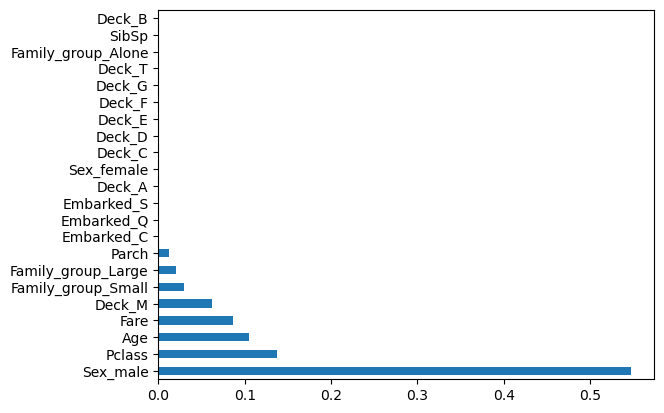

In [65]:
# tree_model2 특성 중요도 값 확인해보기
fi = tree_model2.feature_importances_
fi
# Series 형태로 형변환
fi_s = pd.Series(fi, index=X_train.columns)
fi_s.sort_values(ascending=False)
fi_s.sort_values(ascending=False).plot.barh()
plt.show()

## 앙상블 모델 적용해보기
- 베깅 : 랜덤포레스트
- 부스팅 : Adaboost, Gradient Boost, XG Boost, Light GBM

In [66]:
# 베깅 - RandomForest
# 모델 - import
from sklearn.ensemble import RandomForestClassifier

In [67]:
# 모델 객체 생성
rf_model = RandomForestClassifier(n_estimators=200, # 나무 개수
                                  max_depth=5) # 트리의 깊이 

In [68]:
# 모델 교차검증
# cross_val_score(모델, X_train, y_train, cv = 데이터 분학 갯수)
cv_rf = cross_val_score(rf_model, X_train, y_train, cv=5)
print(cv_rf)
print(cv_rf.mean())

[0.79329609 0.8258427  0.83146067 0.78651685 0.83707865]
0.8148389931579938


In [69]:
# 모델 학습
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [71]:
# 학습된 모델로 예측 진행하기
pre = rf_model.predict(X_test)
pre

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [72]:
rs = pd.read_csv('data/gender_submission.csv')

In [74]:
rs['Survived'] = pre

In [75]:
rs

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [76]:
# 제출 파일 만들기
rs.to_csv('data/rf_model1.csv', index=False)

In [77]:
# 부스팅 알고리즘 사용해보기 - AdaBoost / Gradient Boost
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [82]:
# 모델 객체 생성
ada_model = AdaBoostClassifier(n_estimators=200)
gbm = GradientBoostingClassifier(n_estimators=200, max_depth=5)

In [83]:
# 교차 검증
ada_rs = cross_val_score(ada_model, X_train, y_train, cv=5)
print(ada_rs)
print(ada_rs.mean())

[0.77094972 0.81460674 0.83707865 0.81460674 0.83707865]
0.814864101437449


In [84]:
# 교차 검증
gbm_rs = cross_val_score(gbm, X_train, y_train, cv=5)
print(gbm_rs)
print(gbm_rs.mean())

[0.79888268 0.81460674 0.85393258 0.78089888 0.83707865]
0.817079907099366


In [85]:
# 모델 학습
ada_model.fit(X_train, y_train)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=200)

In [87]:
# 1-1. adaboost model 예측값 확인
pre1 = ada_model.predict(X_test)
rs['Survived'] = pre1

In [88]:
# 1-2. 답안지 파일 만들기 - 값 덮어 씌워주기
rs.to_csv('data/ada_model1.csv', index=False)

In [ ]:
# 1-3. 캐글에 제출할 파일 만들어서 결과 확인하기

# 정확도 : 0.75119

In [89]:
# 2-1. GBM 예측값 확인
pre2 = gbm.predict(X_test)
rs['Survived'] = pre2

In [90]:
# 2-2. 답안지 파일 만들기 - 값 덮어 씌워주기
rs.to_csv('data/gbm1.csv', index=False)

In [ ]:
# 2-3. 캐글에 제출할 파일 만들어서 결과 확인하기

# 정확도 : 0.73684

In [91]:
# 부스팅 알고리즘 사용해보기 - XGBoost / LightGBM
# XG boost / lightgbm은 별도의 설치 필요
# 설치 코드
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 660.6 kB/s eta 0:02:31
   ---------------------------------------- 0.3/99.8 MB 3.8 MB/s eta 0:00:27
   ---------------------------------------- 0.9/99.8 MB 7.0 MB/s eta 0:00:15
    --------------------------------------- 1.6/99.8 MB 9.2 MB/s eta 0:00:11
    --------------------------------------- 2.5/99.8 MB 11.3 MB/s eta 0:00:09
   - -------------------------------------- 3.6/99.8 MB 13.6 MB/s eta 0:00:08
   -- ------------------------------------- 5.1/99.8 MB 16.2 MB/s eta 0:00:06
   -- ------------------------------------- 6.9/99.8 MB 19.1 MB/s eta 0:00:05
   --- ------------------------------------ 8.0/99.8 MB 20.6 MB/s eta 0:00:05
   ---- -----------------

In [92]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.3 MB 1.9 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.3 MB 7.8 MB/s eta 0:00:01
   ------------------------------------ --- 1.2/1.3 MB 11.1 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 10.6 MB/s eta 0:00:00


In [93]:
# 모델 import
from xgboost import XGBClassifier # xgboost 분류모델
from lightgbm import LGBMClassifier # lightgbm 분류모델

In [94]:
# 모델 객체 생성
xgb = XGBClassifier(n_estimators = 200, max_depth=5)
lgb = LGBMClassifier(n_estimators = 200, max_depth=5)

In [96]:
# 교차 검증
rs_xgb = cross_val_score(xgb, X_train, y_train, cv=5)
print(rs_xgb)
print(rs_xgb.mean())

[0.79888268 0.80898876 0.85955056 0.79213483 0.85393258]
0.8226978846274561


In [97]:
# 교차 검증
rs_lgb = cross_val_score(lgb, X_train, y_train, cv=5)
print(rs_lgb)
print(rs_lgb.mean())

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 221
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

In [98]:
# 모델 학습
xgb.fit(X_train, y_train)
lgb.fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 240
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

LGBMClassifier(max_depth=5, n_estimators=200)

In [99]:
# xgb 예측값 확인
pre3 = xgb.predict(X_test)
rs['Survived']=pre3
rs.to_csv('data/xgb1.csv', index=False)
# 0.73684

In [100]:
# lgb 예측값 확인
pre4 = lgb.predict(X_test)
rs['Survived']=pre4
rs.to_csv('data/lgb1.csv', index=False)
# 0.76315

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


### 잊지 말자 ! 하이퍼 파라미터를 제대로 튜닝한 적이 없다 !
- 하이퍼 파라미터의 갯수가 많다... 하나하나 살펴보기에는 시간이 부족하다
- 하이퍼 파라미터 조합을 이용해서 성능을 측정해주는 도구를 사용해보자

In [101]:
# 하이퍼 파라미터 조합식을 구해주는 도구를 사용해보자
# Grid_Search 모델 import
from sklearn.model_selection import GridSearchCV

In [102]:
# 그리프 서치 모델에 사용할 트리모델 불러오기
tree = DecisionTreeClassifier()

In [103]:
# 그리드 서치에 사용할 하이퍼 파라미터 정리
# 딕셔너리 키값은 하이퍼 파라미터의 이름
# 벨류값은 하이퍼 파라미터 묶음 값
params = {
    'max_depth' : [1,2,3,4,5] ,
    'min_samples_split': [100, 150, 200],
    'min_samples_leaf': [1,2,3,4,5],
    'max_leaf_nodes': range(1,4,1)
}

In [104]:
# 그리프 서치 모델 객체 생성
grid = GridSearchCV(tree, 
                    param_grid=params,
                   cv=5)

In [105]:
grid.fit(X_train, y_train)

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
375 fits failed out of a total of 1125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
375 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\smhrd\anaconda3\Lib\site-packa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_leaf_nodes': range(1, 4),
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [100, 150, 200]})

In [107]:
# 그리드 서치에서 찾은 최고의 조합식
grid.best_params_

{'max_depth': 1,
 'max_leaf_nodes': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 100}

In [108]:
# 최고의 조합식을 적용한 모델의 교차검증 점수
grid.best_score_

0.7867365513778168

In [109]:
# 최고의 조합식을 적용한 모델 불러오기
grid_tree = grid.best_estimator_
grid_tree

DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2, min_samples_split=100)

In [110]:
grid_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2, min_samples_split=100)

In [111]:
# 모델 예측
pre = grid_tree.predict(X_test)
pre

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [112]:
# 답안지 작성
rs['Survived'] = pre
# 파일 만들어주기
rs.to_csv('data/grid_tree1.csv', index=False)

### 데이터 스케일링
- 상대적으로 KNN모델보다 Tree 기반의 모델들이 성능이 잘 나왔다.
- 현재 데이터는 스케일링이 되어있지 않은 상태 : 모델이 불안정하다
- 스케일링을 적용해서 거리기반인 KNN모델이 작동을 잘 하도록 만들어보자

In [113]:
# 데이터 스케일 도구 불러오기
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [114]:
# 스케일러 객체 만들기
mm_scale = MinMaxScaler()

In [115]:
# 스케일러 학습 - fit
mm_scale.fit(X_train)

MinMaxScaler()

In [116]:
# 학습된 스케일러를 이용해서 값을 바꿔주기 - transform
X_train_mm = mm_scale.transform(X_train)
X_test_mm = mm_scale.transform(X_test)

In [117]:
X_train_mm

array([[1.    , 0.275 , 0.125 , ..., 0.    , 1.    , 0.    ],
       [0.    , 0.475 , 0.125 , ..., 0.    , 1.    , 0.    ],
       [1.    , 0.325 , 0.    , ..., 1.    , 0.    , 0.    ],
       ...,
       [1.    , 0.2625, 0.125 , ..., 0.    , 1.    , 0.    ],
       [0.    , 0.325 , 0.    , ..., 1.    , 0.    , 0.    ],
       [1.    , 0.4   , 0.    , ..., 1.    , 0.    , 0.    ]])

In [118]:
# knn 모델 사용하기
from sklearn.neighbors import KNeighborsClassifier
knn_mm = KNeighborsClassifier(n_neighbors=3)

In [119]:
knn_mm.fit(X_train_mm, y_train)

KNeighborsClassifier(n_neighbors=3)

In [120]:
rs_mm = cross_val_score(knn_mm, X_train_mm, y_train, cv=5)
print(rs_mm)
print(rs_mm.mean())

[0.74301676 0.75842697 0.82022472 0.78651685 0.82022472]
0.7856820036407005


In [121]:
pre = knn_mm.predict(X_test_mm)
pre

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [122]:
omr = pd.read_csv('data/gender_submission.csv')
omr['Survived'] = pre

In [123]:
omr

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [124]:
omr.to_csv('data/knn_mm1.csv', index=False)